Q1. Implement a perceptron model to realize AND gate. Start with the weights 
as [0.5, 0.5]. Update the weights using perceptron learning algorithm. Print the 
model parameters after every epoch. Use suitable learning rate. 

Q2. Design a perceptron network to classify 
The RT-IoT2022, a proprietary dataset derived from a real-time IoT 
infrastructure, is introduced as a comprehensive resource integrating a diverse 
range of IoT devices and sophisticated network attack methodologies. This 
dataset encompasses both normal and adversarial network behaviours, 
providing a general representation of real-world scenarios. Incorporating data 
from IoT devices such as ThingSpeak-LED, Wipro-Bulb, and MQTT-Temp, as 
well as simulated attack scenarios involving Brute-Force SSH attacks, DDoS 
attacks using Hping and Slowloris, and Nmap patterns, RT-IoT2022 offers a 
detailed perspective on the complex nature of network traffic. The bidirectional 
attributes of network traffic are meticulously captured using the Zeek network 
monitoring tool and the Flowmeter plugin. Researchers can leverage the RTIoT2022 dataset to advance the capabilities of Intrusion Detection Systems 
(IDS), fostering the development of robust and adaptive security solutions for 
real-time IoT networks. 
Use the dataset IoT dataset having 85 features such as service, flow duratioj 
etc. to classify the pattern as normal or attack pattern. 
The Dataset contains both Attack patterns and Normal Patterns. 

Attacks patterns Details:

1. DOS_SYN_Hping------------------------94659 
2. ARP_poisioning--------------------------7750 
3. NMAP_UDP_SCAN--------------------2590 
4. NMAP_XMAS_TREE_SCAN--------2010 
5. NMAP_OS_DETECTION-------------2000 
6. NMAP_TCP_scan-----------------------1002 
7. DDOS_Slowloris------------------------534 
8. Metasploit_Brute_Force_SSH---------37 
9. NMAP_FIN_SCAN---------------------28 

Normal Patterns Details: 

1. MQTT -----------------------------------8108 
2. Thing_speak-----------------------------4146 
3. Wipro_bulb_Dataset-------------------253 

Implement the same with Sklearn library (MLP classifier). Fine tune the hyper 
parameters to get maximum accuracy.

In [55]:
# Made by Aastha Kumar (21BCE5067)
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O 

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/rt-iot2022real-time-internet-of-things/RT_IOT2022.csv


In [58]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [59]:
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [60]:
# Importing Dataset
df = pd.read_csv("/kaggle/input/rt-iot2022real-time-internet-of-things/RT_IOT2022.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123117 entries, 0 to 123116
Data columns (total 85 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   no                        123117 non-null  int64  
 1   id.orig_p                 123117 non-null  int64  
 2   id.resp_p                 123117 non-null  int64  
 3   proto                     123117 non-null  object 
 4   service                   123117 non-null  object 
 5   flow_duration             123117 non-null  float64
 6   fwd_pkts_tot              123117 non-null  int64  
 7   bwd_pkts_tot              123117 non-null  int64  
 8   fwd_data_pkts_tot         123117 non-null  int64  
 9   bwd_data_pkts_tot         123117 non-null  int64  
 10  fwd_pkts_per_sec          123117 non-null  float64
 11  bwd_pkts_per_sec          123117 non-null  float64
 12  flow_pkts_per_sec         123117 non-null  float64
 13  down_up_ratio             123117 non-null  f

In [61]:
# Finding if rows have null values
df.isnull().sum()

no                      0
id.orig_p               0
id.resp_p               0
proto                   0
service                 0
                       ..
idle.std                0
fwd_init_window_size    0
bwd_init_window_size    0
fwd_last_window_size    0
Attack_type             0
Length: 85, dtype: int64

In [62]:
# Label Encoding for categorical columns
label = LabelEncoder()
for col in cat_cols:
    df[col] = label.fit_transform(df[col])

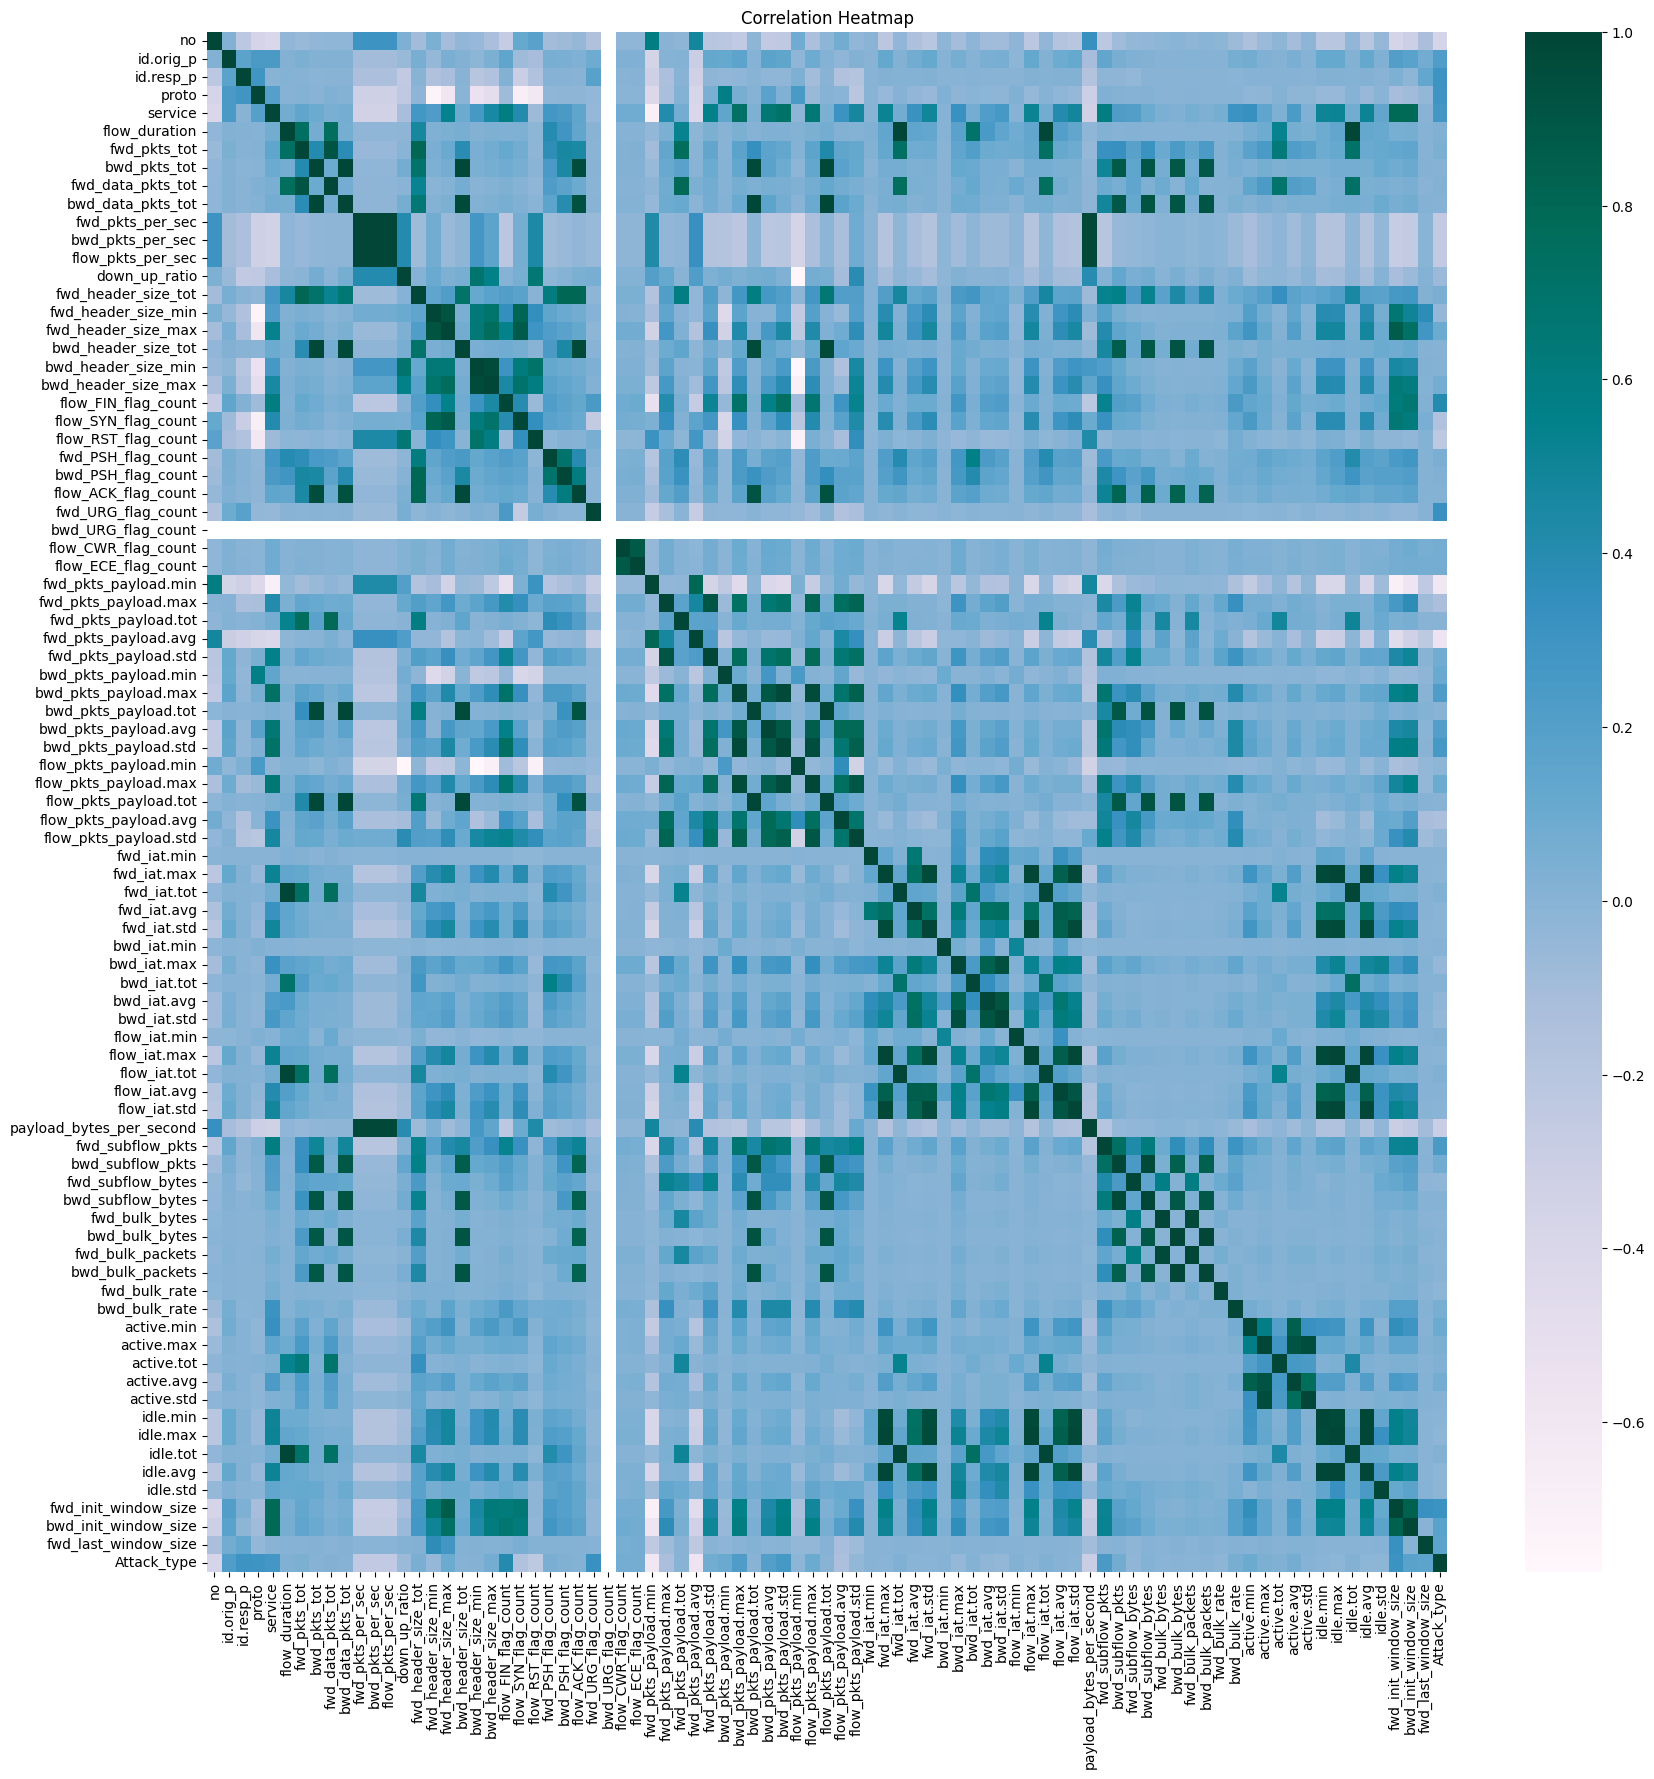

In [63]:
# CORRELATION HEATMAP
numeric_df = df.select_dtypes(include=['number'])
correlation_matrix = numeric_df.corr()
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=False, cmap='PuBuGn')
plt.title("Correlation Heatmap")
plt.show()

In [64]:
# Separating the train parameters and target vector
target = 'Attack_type'
X = df.drop(target,axis=1)
y = df[target]

In [65]:
# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=14)

In [66]:
# Training MLP Classifier with different activation functions
act_funcs = ['relu','tanh','identity','logistic']
for act in act_funcs:
    model_MLP = MLPClassifier(hidden_layer_sizes=(100,), activation=act, solver='adam', max_iter=300, random_state=14)
    model_MLP.fit(X_train, y_train)
    y_pred = model_MLP.predict(X_test)
    print(f"\n The accuracy obtained for MLP Classifier with activation = {act} and solver = adam: {round(accuracy_score(y_pred,y_test)*100,5)} %\n")


 The accuracy obtained for MLP Classifier with activation = relu and solver = adam: 96.39782 %


 The accuracy obtained for MLP Classifier with activation = tanh and solver = adam: 93.46572 %


 The accuracy obtained for MLP Classifier with activation = identity and solver = adam: 94.9602 %


 The accuracy obtained for MLP Classifier with activation = logistic and solver = adam: 94.05864 %



In [68]:
# Standard Scaling and training with MLP Classifier
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model_MLP_scaled = MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='adam', max_iter=150, random_state=14)
model_MLP_scaled.fit(X_train_scaled, y_train)
y_pred_scaled = model_MLP_scaled.predict(X_test_scaled)
print(f"\n The accuracy obtained for Standard Scaler, relu activation function and adam optimizer is: {round(accuracy_score(y_pred_scaled, y_test)*100,5)} %")


 The accuracy obtained for Standard Scaler, relu activation function and adam optimizer is: 99.63856 %


In [69]:
# Training other classifiers
models = {
    'Logistic Regression': LogisticRegression(),
}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"\n The accuracy obtained for {model_name}: {round(accuracy_score(y_pred,y_test)*100,5)} %\n")


 The accuracy obtained for Logistic Regression: 89.22596 %



In [70]:
# Using DecisionTreeClassifier
# Initialize the model with entropy as criterion
dt = DecisionTreeClassifier(criterion="entropy", random_state=42)

# Fit the model
dt.fit(X_train, y_train)

# Predict the test set results
y_pred_dt = dt.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_dt)
print("Accuracy for DecisionTreeClassifier with entropy criterion:", accuracy)

# You may also print other evaluation metrics like classification report if needed
classification_report_op = classification_report(y_test, y_pred_dt)
print("\nClassification Report for DecisionTreeClassifier with entropy criterion:\n", classification_report_op)


Accuracy for DecisionTreeClassifier with entropy criterion: 0.9985380116959064

Classification Report for DecisionTreeClassifier with entropy criterion:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      1598
           1       1.00      1.00      1.00       111
           2       1.00      1.00      1.00     18986
           3       1.00      1.00      1.00       808
           4       1.00      0.89      0.94         9
           5       1.00      0.50      0.67         6
           6       1.00      1.00      1.00       356
           7       1.00      1.00      1.00       227
           8       0.99      0.99      0.99       468
           9       0.99      1.00      0.99       405
          10       0.99      0.99      0.99      1602
          11       1.00      1.00      1.00        48

    accuracy                           1.00     24624
   macro avg       1.00      0.95      0.96     24624
weighted avg       1.00      1.00 

**Inference**

The accuracy obtained for MLP Classifier with activation = relu and solver = adam: 96.39782 %


 The accuracy obtained for MLP Classifier with activation = tanh and solver = adam: 93.46572 %


 The accuracy obtained for MLP Classifier with activation = identity and solver = adam: 94.9602 %


 The accuracy obtained for MLP Classifier with activation = logistic and solver = adam: 94.05864 %

 The accuracy obtained for Standard Scaler, relu activation function and adam optimizer is: 99.63856 %
 
 The accuracy obtained for Logistic Regression: 89.22596 %
 
 Accuracy for DecisionTreeClassifier with entropy criterion: 99.85380116959064 %